# Fire vs No Fire Detection Using Flame Dataset
Installing Basic EDA for Colab



In [8]:
!pip install basic_image_eda

Importing required libraries

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import time
from basic_image_eda import BasicImageEDA

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
train_dir = "/content/drive/MyDrive/DS_Assignment/trainning/"
test_dir = "/content/drive/MyDrive/DS_Assignment/test/"

# train_dir = "Training/"
# test_dir = "Test/"

In [12]:
train_fire = train_dir+"Fire/"
train_no_fire = train_dir+"No_Fire/"
test_fire = test_dir+"Fire/"
test_no_fire = test_dir+"No_Fire/"

In [13]:
extensions = ['jpg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

Performing Basic EDA for Train Fire and No Fire set


found 25018 images.


  0%|          | 0/25018 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 25018/25018 [56:36<00:00,  7.37it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  25018

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  254
max height                               |  254
mean height                              |  254.0
median height                            |  254

min width                                |  254
max width                                |  254
mean width                               |  254.0
median width                             |  254

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)          |  [256 256] (h x w, mul

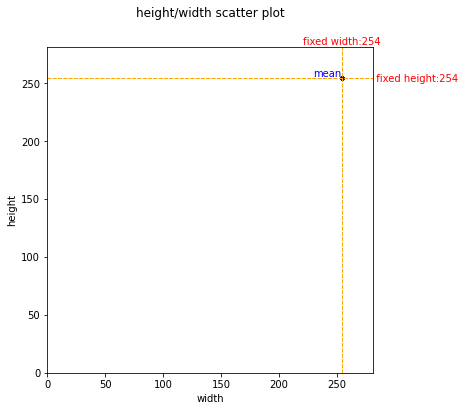

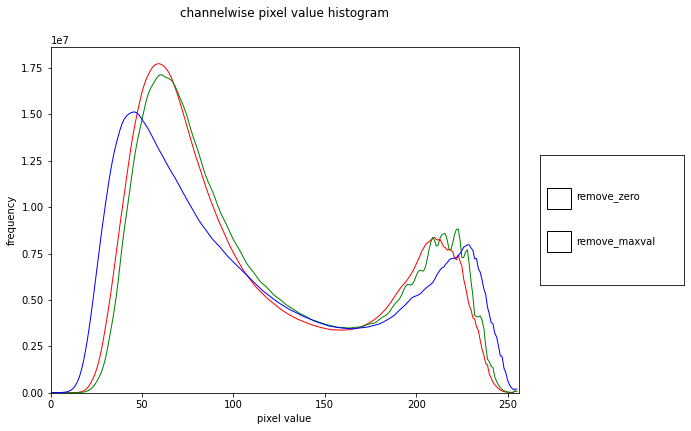

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 254,
 'max_w': 254,
 'mean': array([0.4388082 , 0.45361987, 0.43862018], dtype=float32),
 'mean_h': 254.0,
 'mean_hw_ratio': 1.0,
 'mean_w': 254.0,
 'median_h': 254,
 'median_hw_ratio': 1.0,
 'median_w': 254,
 'min_h': 254,
 'min_w': 254,
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'rec_hw_size_8': array([256, 256]),
 'std': array([0.24370754, 0.2436369 , 0.266914  ], dtype=float32)}

In [15]:
BasicImageEDA.explore(train_dir+"Fire/", extensions, 
                      threads, dimension_plot, channel_hist, nonzero, hw_division_factor)


found 14357 images.


  0%|          | 0/14357 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 14357/14357 [33:01<00:00,  7.25it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  14357

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  254
max height                               |  254
mean height                              |  254.0
median height                            |  254

min width                                |  254
max width                                |  254
mean width                               |  254.0
median width                             |  254

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)          |  [256 256] (h x w, mul

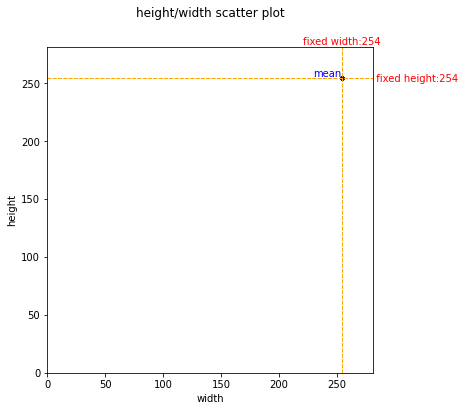

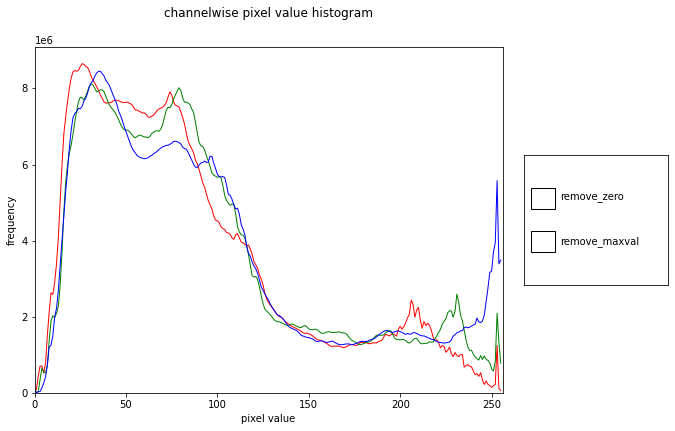

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 254,
 'max_w': 254,
 'mean': array([0.32786968, 0.35291398, 0.37128612], dtype=float32),
 'mean_h': 254.0,
 'mean_hw_ratio': 1.0,
 'mean_w': 254.0,
 'median_h': 254,
 'median_hw_ratio': 1.0,
 'median_w': 254,
 'min_h': 254,
 'min_w': 254,
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'rec_hw_size_8': array([256, 256]),
 'std': array([0.22265254, 0.23376898, 0.25552094], dtype=float32)}

In [16]:
BasicImageEDA.explore(train_dir+"No_Fire/", extensions, 
                      threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

Checking class distribution for train set

In [17]:
train_fire = os.listdir(train_dir+"Fire/")
train_no_fire = os.listdir(train_dir+"No_Fire/")
print("fire example: ", len(train_fire))
print("no fire example: ", len(train_no_fire))

fire example:  25018
no fire example:  14357


Analysing HSV histograms for Train Fire and No Fire set

resized_frame24152.jpg


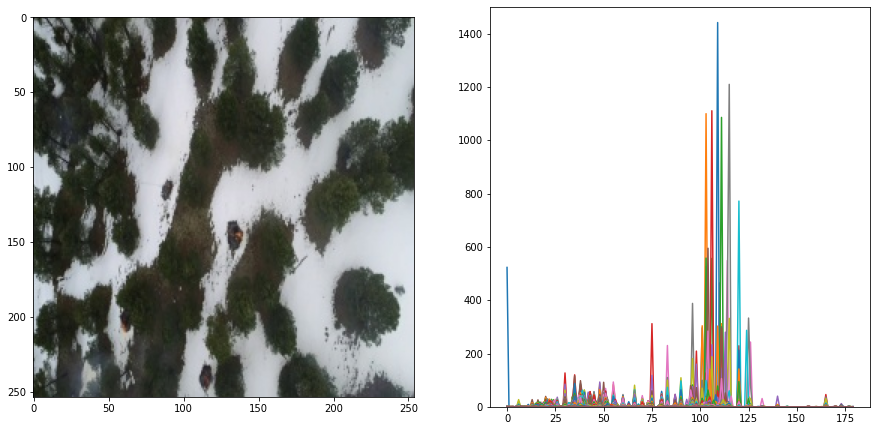

resized_frame25580.jpg


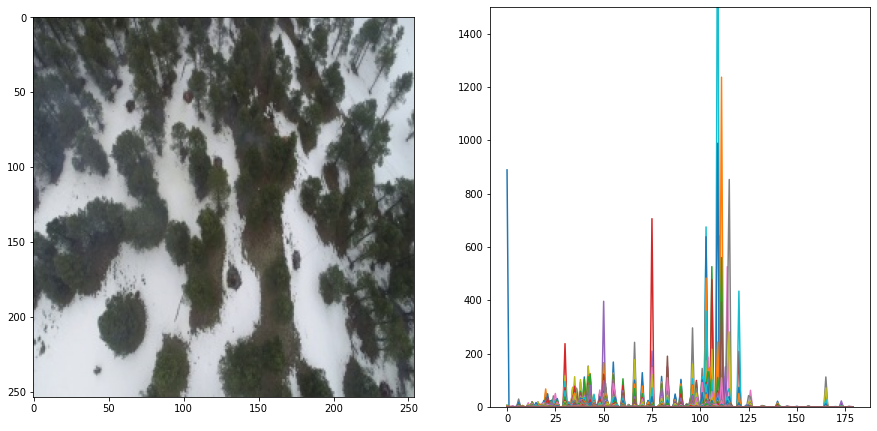

resized_frame20881.jpg


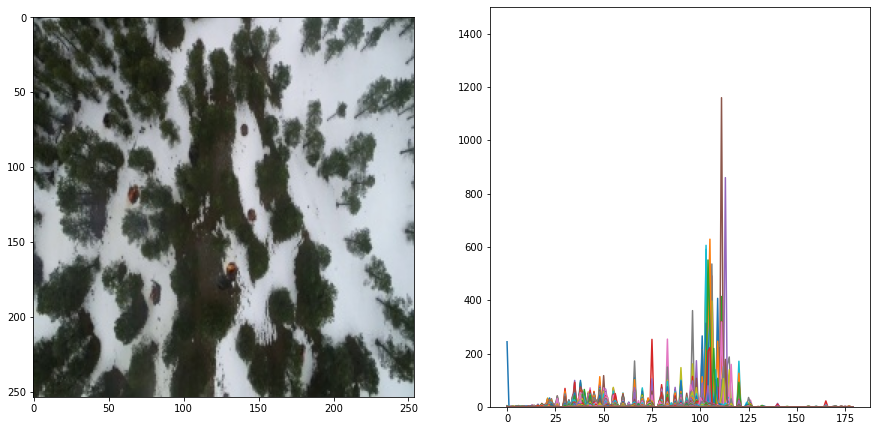

In [18]:
n = 3
hist_fire = []
for j in range(n):    
    img_name = train_fire[np.random.choice(range(7000),1,replace=False)[0]]
    print(img_name)
    image = cv2.imread(train_dir+"Fire/"+img_name)
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    fig = plt.figure(figsize=(15,25))
    fig.add_subplot(n,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    fig.add_subplot(n,2,2)
    hist1 = cv2.calcHist([img_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    hist_fire.append(hist1)
    plt.plot(hist1)
    plt.ylim([0, 1500])
    plt.show()

lake_resized_lake_frame5142.jpg


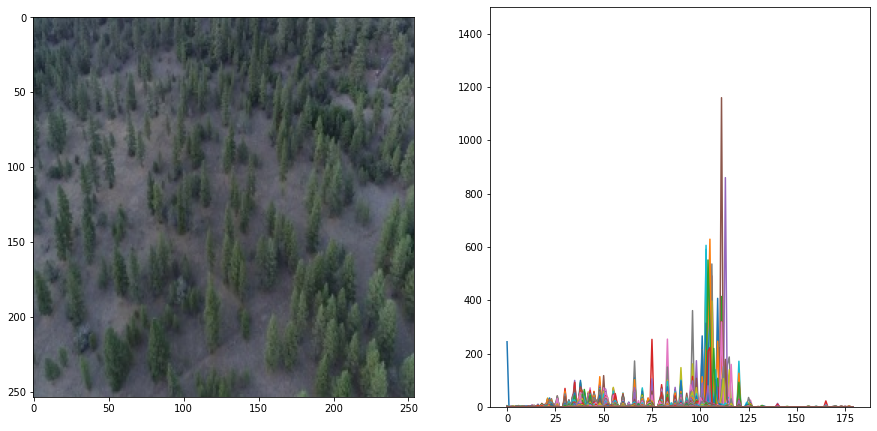

lake_resized_lake_frame5545.jpg


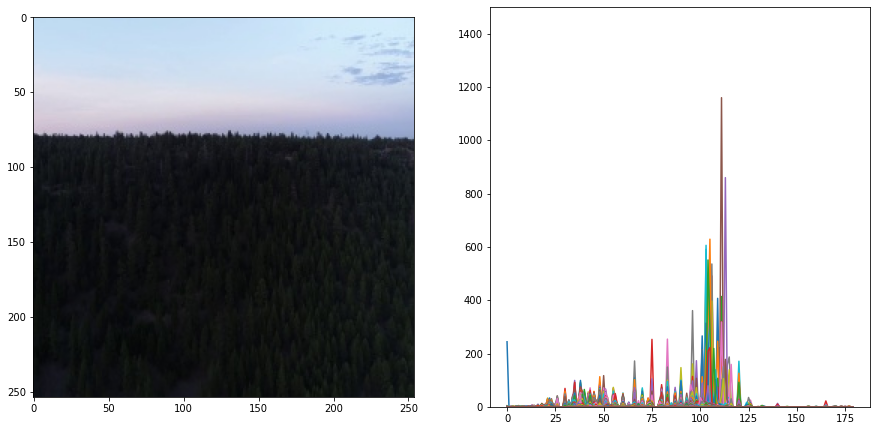

lake_resized_lake_frame8235.jpg


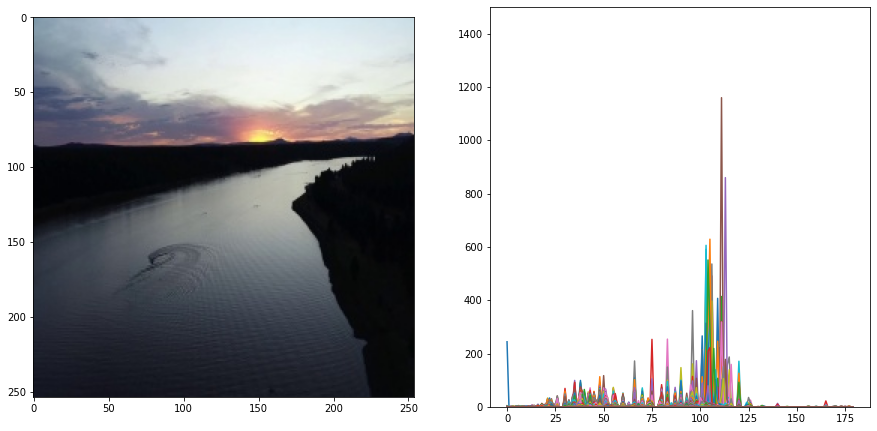

In [19]:
n = 3
hist_no_fire = []
for j in range(n):    
    img_name = train_no_fire[np.random.choice(range(7000),1,replace=False)[0]]
    print(img_name)
    image = cv2.imread(train_dir+"No_Fire/"+img_name)
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    fig = plt.figure(figsize=(15,25))
    fig.add_subplot(n,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    fig.add_subplot(n,2,2)
    hist2 = cv2.calcHist([img_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    hist_no_fire.append(hist2)
    plt.plot(hist1)
    plt.ylim([0, 1500])
    plt.show()

Comparing histograms for data insight

In [20]:
for i in range(len(hist_fire)-1):
    temp = cv2.compareHist(hist_fire[i], hist_fire[i+1], 0)
    print("hist compare fire vs fire image samples\t\t", temp)
    temp = cv2.compareHist(hist_fire[i], hist_no_fire[i+1], 0)
    print("hist compare fire vs No fire image samples\t", temp)
    temp = cv2.compareHist(hist_no_fire[i], hist_no_fire[i+1], 0)
    print("hist compare No fire vs No fire image samples\t", temp, "\n")

hist compare fire vs fire image samples		 0.6876055427081516
hist compare fire vs No fire image samples	 0.018245585321543783
hist compare No fire vs No fire image samples	 0.10275229813243149 

hist compare fire vs fire image samples		 0.5461906476556754
hist compare fire vs No fire image samples	 0.09466373546581598
hist compare No fire vs No fire image samples	 0.15924902404305583 



Defining custom function to mask fire from images

In [21]:
lower = [0, 100, 100]
upper = [35, 255, 255]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

def display(imgage, img_name):
    plt.figure(figsize=(15,10))
    plt.imshow(imgage)                                                                       
    plt.title(img_name)
    plt.show()
    
def transformFlame(input_img):
    img_rgb = input_img.astype(np.uint8)
#     display(img_rgb, "img_rgb")
    img_bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
#     display(img_bgr, "img_bgr")
    img_blur = cv2.GaussianBlur(img_bgr.copy(), (1,1), 10)
#     display(img_blur, "img_blur")
    img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
#     display(img_hsv, "img_hsv")
    mask = cv2.inRange(img_hsv, lower, upper)
    output = cv2.bitwise_and(img_bgr, img_hsv, mask = mask)
#     display(output, "output")   
    output_rgb = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)
#     display(output_rgb, "output_rgb")
    return output_rgb

Forming Train, Validation and Test generator

In [38]:
IMG_SIZE = 254
NB_CHANNELS = 3
BATCH_SIZE = 16
NB_TRAIN_IMG = 31501
NB_VALID_IMG = 7874
NB_TEST_IMG = 8617

train_datagen = ImageDataGenerator(
#                                    rescale=1.0/255.0, 
#                                    rotation_range=90, 
#                                    horizontal_flip=True, 
#                                    vertical_flip=True,
#                                    zoom_range=[0.5,1.0],
#                                    width_shift_range = 0.1,
#                                    height_shift_range = 0.1,
#                                    shear_range = 0.1,
#                                    fill_mode="nearest",
                                   validation_split=0.2,
                                   preprocessing_function=transformFlame
                                  )
test_datagen = ImageDataGenerator(
                                preprocessing_function=transformFlame
                                )

train_generator = train_datagen.flow_from_directory(train_dir, 
                                  batch_size=BATCH_SIZE,
                                  target_size=(254,254),
                                  color_mode="rgb",
                                  shuffle = True,
                                  class_mode='binary',
                                  subset='training'
                              )
validation_generator = train_datagen.flow_from_directory(train_dir, 
                                  batch_size=BATCH_SIZE,
                                  target_size=(254,254),
                                  color_mode="rgb",
                                  shuffle = True,
                                  class_mode='binary',
                                  subset='validation'                
                                )

test_generator = test_datagen.flow_from_directory(test_dir, 
                                  batch_size=BATCH_SIZE,
                                  target_size=(254,254),
                                  color_mode="rgb",
                                  shuffle = False,
                                  class_mode='binary'
                              )

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [30]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Fire': 0, 'No_Fire': 1}
{'Fire': 0, 'No_Fire': 1}


Verifying some samples from train generator output

In [33]:
def plotimages(images_arr):
    fix, axes = plt.subplots(4, 4, figsize=(15,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = img.astype(np.uint8)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

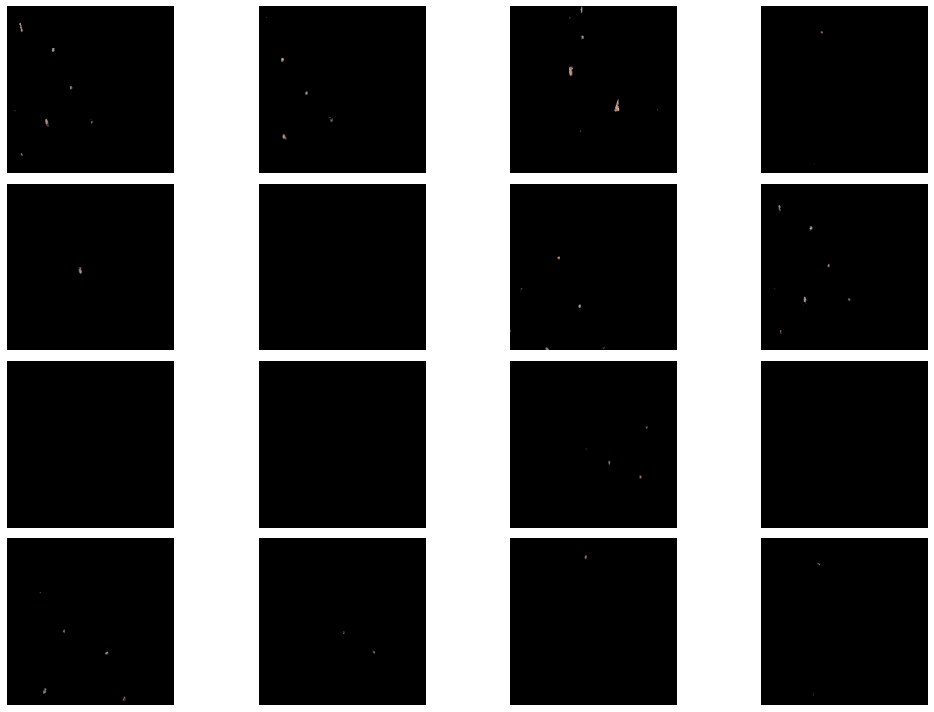

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


In [34]:
imgs, labels = next(train_generator)
plotimages(imgs)
print(labels)

Defining Deep CNN Model

In [39]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(2,2), strides=(1,1), padding='same',
               input_shape=(IMG_SIZE,IMG_SIZE,NB_CHANNELS), data_format='channels_last'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))
cnn.add(Conv2D(filters=64, kernel_size=(2,2), strides=(1,1), padding='valid'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))
cnn.add(Flatten())        
cnn.add(Dense(64))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(1))
cnn.add(Activation('sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      416       
_________________________________________________________________
activation_8 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 64)      8256      
_________________________________________________________________
activation_9 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 254016)           

Training the model and saving the best at early stopping

In [40]:
callbacks = [EarlyStopping(patience=10,verbose=2,monitor='val_loss',mode='min'),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [41]:
start = time.time()
cnn.fit_generator(
    train_generator,
    steps_per_epoch=NB_TRAIN_IMG//BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=NB_VALID_IMG//BATCH_SIZE,
    callbacks=callbacks)
end = time.time()
print('Processing time:',(end - start)/60)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1968/1968 [==============================] - 166s 84ms/step - loss: 0.3809 - accuracy: 0.8405 - val_loss: 0.1969 - val_accuracy: 0.9783
Epoch 2/50
1968/1968 [==============================] - 165s 84ms/step - loss: 0.2769 - accuracy: 0.8776 - val_loss: 0.2117 - val_accuracy: 0.9812
Epoch 3/50
1968/1968 [==============================] - 165s 84ms/step - loss: 0.2735 - accuracy: 0.8800 - val_loss: 0.4588 - val_accuracy: 0.9435
Epoch 4/50
1968/1968 [==============================] - 166s 84ms/step - loss: 0.2749 - accuracy: 0.8785 - val_loss: 0.4336 - val_accuracy: 0.9339
Epoch 5/50
1968/1968 [==============================] - 164s 83ms/step - loss: 0.2750 - accuracy: 0.8770 - val_loss: 0.7284 - val_accuracy: 0.9417
Epoch 6/50
1968/1968 [==============================] - 166s 84ms/step - loss: 0.2735 - accuracy: 0.8811 - val_loss: 0.5351 - val_accuracy: 0.9526
Epoch 7/50
1968/1968 [==============================] - 164s 83ms/step - loss: 0.2722 - accuracy: 0.8784 - val_loss: 0

Loading best model and evaluting it against test set

In [50]:
model = keras.models.load_model(filepath='best_model.h5')
scores = model.evaluate(test_generator, verbose=1)
print("Test Accuracy = ", scores[1])

539/539 [==============================] - 420s 780ms/step - loss: 0.5755 - accuracy: 0.8010
Test Accuracy =  0.8009748458862305
